<a href="https://colab.research.google.com/github/Edith0001/mid_first_team/blob/SEEUN_MID/%5B%EB%A9%8B%EC%82%AC%5D_%EB%AF%B8%EB%93%9C%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving owid-co2-data.csv to owid-co2-data.csv
데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50191 entries, 0 to 50190
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50191 non-null  object 
 1   year                                       50191 non-null  int64  
 2   iso_code                                   42262 non-null  object 
 3   population                                 41019 non-null  float64
 4   gdp                                        15251 non-null  float64
 5   cement_co2                                 28863 non-null  float64
 6   cement_co2_per_capita                      25358 non-null  float64
 7   co2                                        29137 non-null  float64
 8   co2_growth_abs                             26981 non-null  float64
 9   co2_growth_prct                         

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

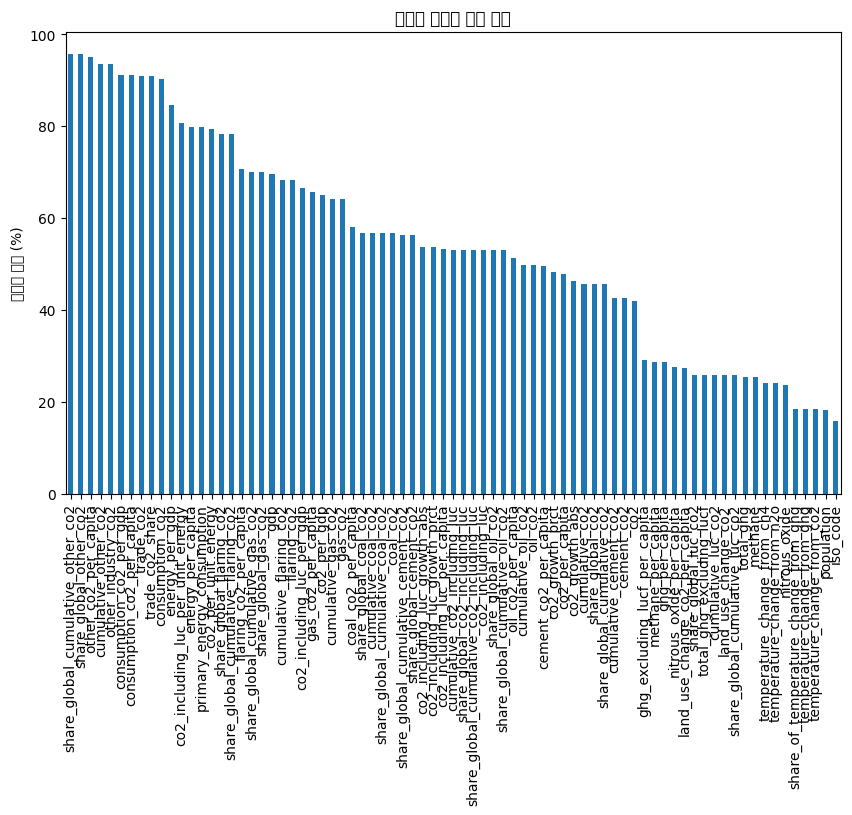

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()  # 파일 업로드 창에서 데이터 파일 선택

data_filename = list(uploaded.keys())[0]
df = pd.read_csv(data_filename)

print("데이터 정보:")
df.info()
print("\n데이터 샘플:")
print(df.head())

# 결측치 확인
missing_values = df.isnull().sum() / len(df) * 100
missing_values = missing_values[missing_values > 10].sort_values(ascending=False)

# 결측치 비율 시각화
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title("결측치 비율이 높은 컬럼")
plt.ylabel("결측치 비율 (%)")
plt.xticks(rotation=90)
plt.show()

# 90% 이상 결측치가 있는 컬럼 제거
high_missing_cols = missing_values[missing_values > 90].index
df_cleaned = df.drop(columns=high_missing_cols)

In [6]:
# 결측치 처리 (보간법 + 중앙값 대체 + 0 대체)
df_cleaned['gdp'] = df_cleaned.groupby('country')['gdp'].transform(lambda x: x.ffill().bfill())
df_cleaned['population'] = df_cleaned.groupby('country')['population'].transform(lambda x: x.ffill().bfill())
df_cleaned['gdp'] = df_cleaned.groupby('country')['gdp'].transform(lambda x: x.fillna(x.median()))
df_cleaned['co2_growth_prct'] = df_cleaned.groupby('country')['co2_growth_prct'].transform(lambda x: x.fillna(x.median()))

# 이상치 탐색/처리
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

def replace_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

key_columns = ['gdp', 'population', 'co2', 'co2_growth_prct', 'coal_co2', 'oil_co2', 'gas_co2']
for col in key_columns:
    if col in df_cleaned.columns:
        df_cleaned = replace_outliers(df_cleaned, col)

# 전처리된 데이터 저장
output_filename = "processed_owid_co2_data.csv"
df_cleaned.to_csv(output_filename, index=False)

# 파일 다운로드
from google.colab import files
files.download(output_filename)

print(f"전처리 완료! 파일이 저장되었습니다: {output_filename}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

전처리 완료! 파일이 저장되었습니다: processed_owid_co2_data.csv
